In [233]:
"""
File : LSTM_training.ipynb
Created by : Amen Ouannes
Brief : Build LSTM models for the training

"""

'\nFile : LSTM_training.ipynb\nCreated by : Amen Ouannes\nBrief : Build LSTM models for the training\n\n'

In [17]:
#importing libraries
import pickle as pk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import ML_tools as tools
importlib.reload(tools)
import LSTM_tools as lstm
importlib.reload(lstm)
#Tensorflow for deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='keras')

In [137]:
#check that cuda is functioning correctly
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    try:
        # Enable memory growth for the first GPU
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print("Memory growth enabled for GPU:", physical_devices[0])
    except RuntimeError as e:
        print(e)
else:
    print("No GPU devices found")


Memory growth enabled for GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


### Dataset treatement

In [103]:
#load ruuvi v1 data
with open('full_datasetv1.pkl', 'rb') as f:
    dataset = pk.load(f)

In [4]:
#load ruuvi v2 data
with open ('full_dataset.pkl', 'rb' ) as f:
    dataset = pk.load(f)

In [5]:
#do proper transformation for the lstm model
list_id = tools.list_id() #import calf macs
calf_values, calf_labels = {}, {}
for key, value in dataset.items(): 
    X, y, label_encoder = lstm.transform_X_y(value) #extract with the convenient number of features
    calf_values[key] = X
    calf_labels[key] = y
assert(len(calf_values) == len(calf_labels))


In [6]:
X_train, X_valid, X_test, y_train, y_valid, y_test = lstm.generate_train(calf_values, calf_labels)
print(X_train[157])
print(y_train[157])

[[-0.8727273   0.17018181  0.4989091   0.01657161  0.01643057  0.01868398
  -0.05341838 -0.12276102  0.2072236 ]
 [-0.88        0.136       0.4912      0.01306394  0.12671578  0.05062455
  -0.0606911  -0.15694284  0.19951451]
 [-0.88355553  0.16711111  0.4977778   0.01333333  0.01411067  0.01686548
  -0.06424665 -0.12583172  0.20609228]
 [-0.8741818   0.16727273  0.4989091   0.0080724   0.01100083  0.00964836
  -0.05487292 -0.1256701   0.2072236 ]
 [-0.882       0.164       0.506       0.01335237  0.01418248  0.01465801
  -0.0626911  -0.12894283  0.2143145 ]
 [-0.8736      0.1648      0.5056      0.01118729  0.01079918  0.01118729
  -0.0542911  -0.12814283  0.2139145 ]
 [-0.8848      0.1424      0.4992      0.05696939  0.07407384  0.01262097
  -0.0654911  -0.15054284  0.20751451]
 [-0.8814545   0.16727273  0.50036365  0.01121038  0.01312319  0.01034672
  -0.06214565 -0.1256701   0.20867814]
 [-0.8746667   0.16        0.50666666  0.01788854  0.01385641  0.01131371
  -0.05535777 -0.13294

In [7]:
print(f'length of a timeframe for a single calf {calf_values[list_id[1]].shape}')
print(f'length of a training set {X_train.shape}, length of training annotations {y_train.shape}')
print(f'length of a validation set {X_valid.shape}, length of validation labels  {y_valid.shape}')
print(f'length of a test set {X_test.shape}, length of test labels  {y_test.shape}')

length of a timeframe for a single calf (604746, 50, 9)
length of a training set (2721357, 50, 9), length of training annotations (2721357, 3)
length of a validation set (151186, 50, 9), length of validation labels  (151186, 3)
length of a test set (151187, 50, 9), length of test labels  (151187, 3)


### build the best model structure

In [60]:
model_flatten = load_model('model_flatten.keras') #load best model
lstm.performances(model_flatten, X_train, y_train, X_valid, y_valid, X_test, y_test) 

14175/14175 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.8192 - loss: 0.4629
4725/4725 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8187 - loss: 0.4648
validation set performance = 81.913%
test set performance = 81.850%


In [59]:
model_maxpooling = load_model('model_maxpooling.keras') #load best model
lstm.performances(model_maxpooling, X_train, y_train, X_valid, y_valid, X_test, y_test) 

14175/14175 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.8164 - loss: 0.4682
4725/4725 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8160 - loss: 0.4690
validation set performance = 81.685%
test set performance = 81.585%


In [61]:
model_DROP = load_model('model_DROP.keras') #load best model
lstm.performances(model_DROP, X_train, y_train, X_valid, y_valid, X_test, y_test) 

14175/14175 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.8115 - loss: 0.4863
4725/4725 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8112 - loss: 0.4882
validation set performance = 81.150%
test set performance = 81.093%


Multi-layer LSTM model 
Built with 4 layers of LSTM

In [230]:
model1 = load_model('model1.keras') #load best model
lstm.performances(model1, X_train, y_train, X_valid, y_valid, X_test, y_test) 

14175/14175 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.8251 - loss: 0.4455
4725/4725 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.8249 - loss: 0.4466
validation set performance = 82.544%
test set performance = 82.483%


### Building a final model with the best combination of layers

In [148]:
final_model = Sequential()
#Bi-directional LSTM layers
final_model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(50, 9)))
final_model.add(Bidirectional(LSTM(32, return_sequences=True)))
final_model.add(Bidirectional(LSTM(64, return_sequences=True)))
final_model.add(Dropout(0.5))
#MaxPooling layer to convert the (40, 4) to linear
final_model.add(GlobalMaxPooling1D())  
#fully connected layer
final_model.add(Dense(32, activation='relu'))
#softmax layer for the multi-class classification
final_model.add(Dense(3, activation='softmax'))
final_model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_51                │ (None, 50, 128)        │        37,888 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_52                │ (None, 50, 64)         │        41,216 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_53                │ (None, 50, 128)        │        66,048 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_17         │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 149,379 (583.51 KB)

 Trainable params: 149,379 (583.51 KB)

 Non-trainable params: 0 (0.00 B)

 #### RUUVI V1

**FULL DATASET**

Epoch 1/20
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 149s 18ms/step - accuracy: 0.7318 - loss: 0.6557 - val_accuracy: 0.7858 - val_loss: 0.5324
Epoch 2/20
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 145s 18ms/step - accuracy: 0.7876 - loss: 0.5321 - val_accuracy: 0.7962 - val_loss: 0.5149
Epoch 3/20
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 146s 18ms/step - accuracy: 0.7986 - loss: 0.5095 - val_accuracy: 0.8086 - val_loss: 0.4872
Epoch 4/20
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 148s 18ms/step - accuracy: 0.8084 - loss: 0.4895 - val_accuracy: 0.8131 - val_loss: 0.4764
Epoch 5/20
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 141s 17ms/step - accuracy: 0.8123 - loss: 0.4803 - val_accuracy: 0.8155 - val_loss: 0.4725
Epoch 6/20
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 143s 18ms/step - accuracy: 0.8158 - loss: 0.4725 - val_accuracy: 0.8173 - val_loss: 0.4683
Epoch 7/20
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 147s 18ms/step - accuracy: 0.8185 - loss: 0.4665 - val_accuracy: 0.8192 - val_loss: 0.4611
Epoch 8/20
8064/8064 ━━━━━━━━━━━━━━━━━━━━ 147s 18ms/step - accuracy: 

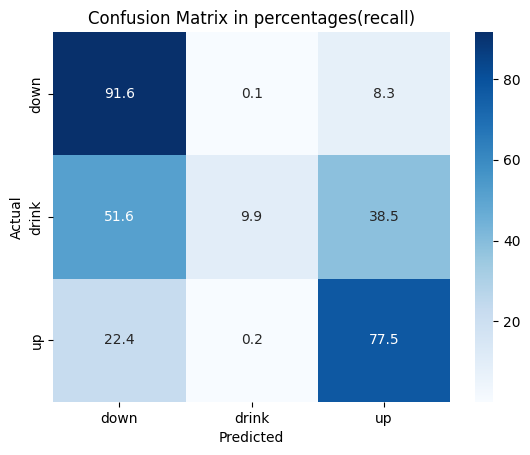

In [96]:
cp = ModelCheckpoint('final_modelv1.keras', save_best_only=True)
final_model.compile(optimizer=Adam(learning_rate=0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])
with tf.device('/CPU:0'):
    final_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs = 20, callbacks = [cp], batch_size=300)
final_model = load_model('final_modelv1.keras') #load best model
lstm.performances(final_model, X_train, y_train, X_valid, y_valid, X_test, y_test) 
lstm.confusion_lstm(final_model, X_test, y_test)

#### RUUVI V2 + BEST COMBO OF FEATURE

##### full dataset

In [100]:
#generate model checkpoint and compile it
cp = ModelCheckpoint('final_model.keras', save_best_only=True)
final_model.compile(optimizer=Adam(learning_rate=0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [101]:
#fitting the model with the use of GPU
with tf.device('/CPU:0'):
    final_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs = 10, callbacks = [cp], batch_size=300)

Epoch 1/10
9072/9072 ━━━━━━━━━━━━━━━━━━━━ 134s 15ms/step - accuracy: 0.8672 - loss: 0.3397 - val_accuracy: 0.8751 - val_loss: 0.3467
Epoch 2/10
9072/9072 ━━━━━━━━━━━━━━━━━━━━ 133s 15ms/step - accuracy: 0.8890 - loss: 0.2826 - val_accuracy: 0.8879 - val_loss: 0.3075
Epoch 3/10
9072/9072 ━━━━━━━━━━━━━━━━━━━━ 131s 14ms/step - accuracy: 0.8930 - loss: 0.2720 - val_accuracy: 0.8944 - val_loss: 0.2912
Epoch 4/10
9072/9072 ━━━━━━━━━━━━━━━━━━━━ 123s 14ms/step - accuracy: 0.8960 - loss: 0.2646 - val_accuracy: 0.8947 - val_loss: 0.2962
Epoch 5/10
9072/9072 ━━━━━━━━━━━━━━━━━━━━ 132s 14ms/step - accuracy: 0.8984 - loss: 0.2589 - val_accuracy: 0.8974 - val_loss: 0.2815
Epoch 6/10
9072/9072 ━━━━━━━━━━━━━━━━━━━━ 136s 15ms/step - accuracy: 0.9000 - loss: 0.2555 - val_accuracy: 0.8962 - val_loss: 0.2818
Epoch 7/10
9072/9072 ━━━━━━━━━━━━━━━━━━━━ 136s 15ms/step - accuracy: 0.9011 - loss: 0.2526 - val_accuracy: 0.8990 - val_loss: 0.2832
Epoch 8/10
9072/9072 ━━━━━━━━━━━━━━━━━━━━ 136s 15ms/step - accuracy: 

In [102]:
final_model = load_model('final_model.keras') #load best model
lstm.performances(final_model, X_train, y_train, X_valid, y_valid, X_test, y_test) 

4725/4725 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9020 - loss: 0.2697
4725/4725 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9020 - loss: 0.2691
validation set performance = 90.277%
test set performance = 90.202%


4725/4725 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


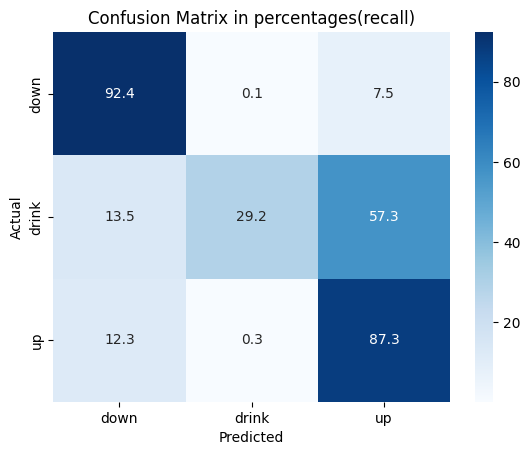

In [103]:
lstm.confusion_lstm(final_model, X_test, y_test)

##### UNDERSAMPLED DATASET MODEL

In [106]:
cp = ModelCheckpoint('undersampled.keras', save_best_only=True)
final_model.compile(optimizer=Adam(learning_rate=0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [107]:
#generate balanced train
X_train, X_valid, X_test, y_train, y_valid, y_test = lstm.generate_train_sampled(calf_values, calf_labels)

In [110]:
print(f'length of a timeframe for a single calf {calf_values[list_id[1]].shape}')
print(f'length of a training set {X_train.shape}, length of training annotations {y_train.shape}')
print(f'length of a validation set {X_valid.shape}, length of validation labels  {y_valid.shape}')
print(f'length of a test set {X_test.shape}, length of test labels  {y_test.shape}')

length of a timeframe for a single calf (604796, 5, 9)
length of a training set (97594, 5, 9), length of training annotations (97594, 3)
length of a validation set (5422, 5, 9), length of validation labels  (5422, 3)
length of a test set (5422, 5, 9), length of test labels  (5422, 3)


Epoch 1/20
976/976 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.8815 - loss: 0.3051 - val_accuracy: 0.8442 - val_loss: 0.4030
Epoch 2/20
976/976 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8894 - loss: 0.2863 - val_accuracy: 0.8366 - val_loss: 0.4139
Epoch 3/20
976/976 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8934 - loss: 0.2775 - val_accuracy: 0.8279 - val_loss: 0.4192
Epoch 4/20
976/976 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8968 - loss: 0.2703 - val_accuracy: 0.8423 - val_loss: 0.4096
Epoch 5/20
976/976 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8997 - loss: 0.2617 - val_accuracy: 0.8423 - val_loss: 0.4087
Epoch 6/20
976/976 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9022 - loss: 0.2549 - val_accuracy: 0.8430 - val_loss: 0.4166
Epoch 7/20
976/976 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9034 - loss: 0.2524 - val_accuracy: 0.8335 - val_loss: 0.4264
Epoch 8/20
976/976 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9072 - loss: 0.2444 - 

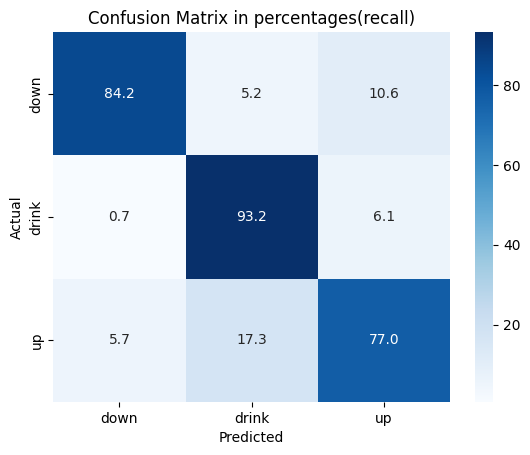

In [111]:
#fitting the model with the use of GPU
with tf.device('/CPU:0'):
    final_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs = 20, callbacks = [cp], batch_size=100)
final_model = load_model('undersampled.keras') #load best model
lstm.performances(final_model, X_train, y_train, X_valid, y_valid, X_test, y_test)
lstm.confusion_lstm(final_model, X_test, y_test)

Epoch 1/20
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.7385 - loss: 0.5797 - val_accuracy: 0.7981 - val_loss: 0.4394
Epoch 2/20
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.8086 - loss: 0.4266 - val_accuracy: 0.8251 - val_loss: 0.3961
Epoch 3/20
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.8237 - loss: 0.3950 - val_accuracy: 0.8315 - val_loss: 0.3746
Epoch 4/20
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.8321 - loss: 0.3748 - val_accuracy: 0.8361 - val_loss: 0.3630
Epoch 5/20
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.8392 - loss: 0.3605 - val_accuracy: 0.8382 - val_loss: 0.3600
Epoch 6/20
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.8432 - loss: 0.3502 - val_accuracy: 0.8426 - val_loss: 0.3453
Epoch 7/20
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.8482 - loss: 0.3410 - val_accuracy: 0.8489 - val_loss: 0.3322
Epoch 8/20
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.8524 -

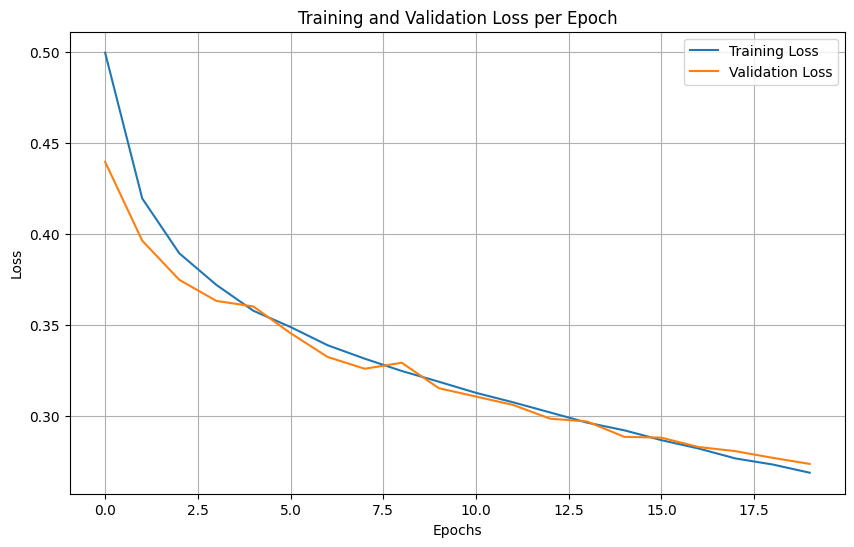

In [174]:
with tf.device('/CPU:0'):
    history = final_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), 
                              epochs=20, callbacks=[cp], batch_size=300)

    # Plotting the training and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

##### WEIGHTED CLASSIFICATION

Epoch 1/10
9072/9072 ━━━━━━━━━━━━━━━━━━━━ 240s 26ms/step - accuracy: 0.9848 - loss: 0.0362 - val_accuracy: 0.9854 - val_loss: 0.0513
Epoch 2/10
9072/9072 ━━━━━━━━━━━━━━━━━━━━ 230s 25ms/step - accuracy: 0.9875 - loss: 0.0282 - val_accuracy: 0.9801 - val_loss: 0.0715
Epoch 3/10
9072/9072 ━━━━━━━━━━━━━━━━━━━━ 234s 26ms/step - accuracy: 0.9882 - loss: 0.0267 - val_accuracy: 0.9870 - val_loss: 0.0501
Epoch 4/10
9072/9072 ━━━━━━━━━━━━━━━━━━━━ 209s 23ms/step - accuracy: 0.9891 - loss: 0.0253 - val_accuracy: 0.9887 - val_loss: 0.0421
Epoch 5/10
9072/9072 ━━━━━━━━━━━━━━━━━━━━ 225s 25ms/step - accuracy: 0.9903 - loss: 0.0222 - val_accuracy: 0.9902 - val_loss: 0.0356
Epoch 6/10
9072/9072 ━━━━━━━━━━━━━━━━━━━━ 231s 25ms/step - accuracy: 0.9908 - loss: 0.0218 - val_accuracy: 0.9923 - val_loss: 0.0353
Epoch 7/10
9072/9072 ━━━━━━━━━━━━━━━━━━━━ 212s 23ms/step - accuracy: 0.9912 - loss: 0.0210 - val_accuracy: 0.9907 - val_loss: 0.0347
Epoch 8/10
9072/9072 ━━━━━━━━━━━━━━━━━━━━ 230s 25ms/step - accuracy: 

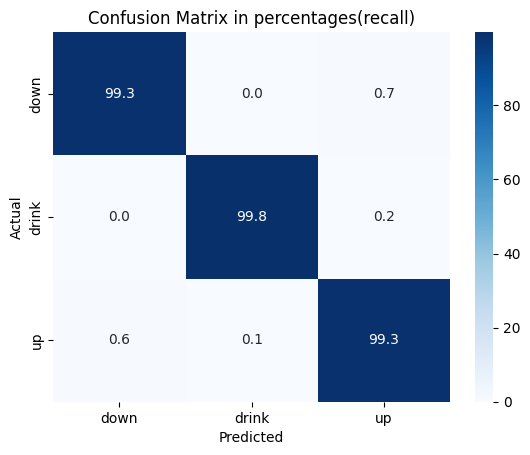

In [158]:
#train the model with keeping in mind the existence of class imbalance
from sklearn.utils.class_weight import compute_class_weight
y_train_labels = np.argmax(y_train, axis=1)
unique_values, counts = np.unique(y_train_labels, return_counts=True)

# Compute class weights
classes = np.unique(y_train_labels)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_labels)
class_weight_dict = dict(zip(classes, class_weights))
sample_weights = np.array([class_weights[label] for label in y_train_labels])

cp = ModelCheckpoint('weighted50_5.keras', save_best_only=True)
final_model.compile(optimizer=Adam(learning_rate=0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

with tf.device('/CPU:0'):
    final_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs = 10, sample_weight=sample_weights, callbacks = [cp], batch_size=300)
final_model = load_model('weighted50_5.keras') #load best model
lstm.performances(final_model, X_train, y_train, X_valid, y_valid, X_test, y_test)
lstm.confusion_lstm(final_model, X_test, y_test)

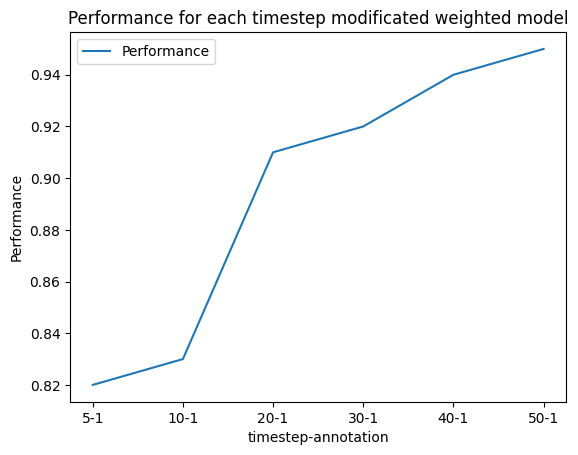

In [154]:
x = ['5-1', '10-1', '20-1', '30-1', '40-1', '50-1']
y = [0.82, 0.83, 0.91, 0.92, 0.94, 0.95]

plt.plot(x, y, label="Performance")  

plt.xlabel('timestep-annotation')
plt.ylabel('Performance')
plt.title('Performance for each timestep modificated weighted model')
plt.legend()  

plt.show()

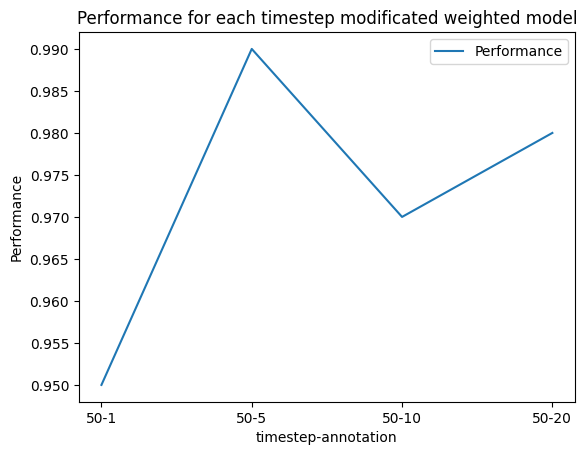

In [159]:
x = ['50-1', '50-5', '50-10', '50-20']
y = [0.95, 0.99, 0.97, 0.98]

plt.plot(x, y, label="Performance")  

plt.xlabel('timestep-annotation')
plt.ylabel('Performance')
plt.title('Performance for each timestep modificated weighted model')
plt.legend()  

plt.show()

### Leave one calf out 

In [10]:
one_calf = Sequential()
one_calf.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(50, 5)))
one_calf.add(Bidirectional(LSTM(32, return_sequences=True)))
one_calf.add(Bidirectional(LSTM(64, return_sequences=True)))
one_calf.add(Dropout(0.5))
one_calf.add(Dense(32, activation='relu'))
#final_model.add(Dense(16, activation='relu'))
one_calf.add(Flatten())
one_calf.add(Dense(3, activation='softmax')) 
one_calf.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_3 (Bidirectional) │ (None, 50, 128)        │        35,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 50, 64)         │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 50, 128)        │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50, 32)         │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         4,803 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 152,035 (593.89 KB)

 Trainable params: 152,035 (593.89 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#generate model checkpoint and compile it
cp = ModelCheckpoint('one_calf.keras', save_best_only=True)
one_calf.compile(optimizer=Adam(learning_rate=0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [20]:
def train_lstm(calf_values, calf_labels, list_id,features=4):
    performances = []
    for i in list_id:
        X_train, X_valid, X_test, y_train, y_valid, y_test = lstm.leave_one_calf_out(calf_values, calf_labels, i, 9)
        with tf.device('/CPU:0'):
            one_calf.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs = 5, callbacks = [cp], batch_size=400)
        train_loss, train_accuracy = one_calf.evaluate(X_train, y_train)
        valid_loss, valid_accuracy = one_calf.evaluate(X_valid, y_valid)
        test_loss, test_accuracy = one_calf.evaluate(X_test, y_test)
        #lstm.confusion_matrix(one_calf, X_test, y_test)
        performances.append((train_accuracy, valid_accuracy,test_accuracy))
    return performances

In [21]:
performances = train_lstm(calf_values, calf_labels, list_id)

Epoch 1/5
6048/6048 ━━━━━━━━━━━━━━━━━━━━ 261s 43ms/step - accuracy: 0.9928 - loss: 0.0231 - val_accuracy: 0.8843 - val_loss: 0.7493
Epoch 2/5
6048/6048 ━━━━━━━━━━━━━━━━━━━━ 243s 40ms/step - accuracy: 0.9936 - loss: 0.0207 - val_accuracy: 0.8808 - val_loss: 0.7510
Epoch 3/5
6048/6048 ━━━━━━━━━━━━━━━━━━━━ 249s 41ms/step - accuracy: 0.9938 - loss: 0.0198 - val_accuracy: 0.8910 - val_loss: 0.7278
Epoch 4/5
6048/6048 ━━━━━━━━━━━━━━━━━━━━ 253s 42ms/step - accuracy: 0.9942 - loss: 0.0184 - val_accuracy: 0.8884 - val_loss: 0.7062
Epoch 5/5
6048/6048 ━━━━━━━━━━━━━━━━━━━━ 252s 42ms/step - accuracy: 0.9946 - loss: 0.0174 - val_accuracy: 0.8815 - val_loss: 0.7243
75594/75594 ━━━━━━━━━━━━━━━━━━━━ 554s 7ms/step - accuracy: 0.9794 - loss: 0.0623
14174/14174 ━━━━━━━━━━━━━━━━━━━━ 103s 7ms/step - accuracy: 0.8943 - loss: 0.6533
4725/4725 ━━━━━━━━━━━━━━━━━━━━ 36s 8ms/step - accuracy: 0.8957 - loss: 0.6423
Epoch 1/5
6048/6048 ━━━━━━━━━━━━━━━━━━━━ 254s 42ms/step - accuracy: 0.9792 - loss: 0.0669 - val_accu

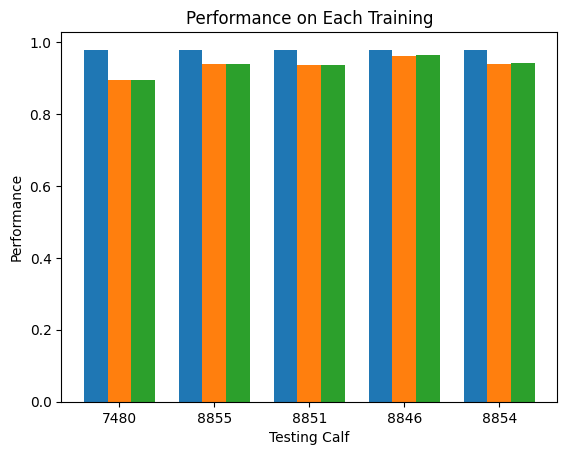

In [26]:
import matplotlib.pyplot as plt
import numpy as np
macs= {"D1:B6:FC:34:99:3A" : 7480, "F4:CC:E1:C5:8A:A9" :8855,
       "FB:E5:24:5B:8A:68" : 8851, "D0:C9:50:5E:88:F8" :8846, "D3:6B:03:69:94:4E" : 8854}

# List of MAC addresses (keys)
list_id = list(macs.keys())

# Extract x_values based on list_id order
x_values = [macs[key] for key in list_id]

# Assuming performances is a list of 3D tuples
performances = np.array(performances)

# Split the 3D tuples into separate sets
performances_set1 = performances[:, 0]
performances_set2 = performances[:, 1]
performances_set3 = performances[:, 2]

# Bar width and x positions
bar_width = 0.25
x = np.arange(len(list_id))

# Plotting
fig, ax = plt.subplots()

# Plotting the bars for each set
bar1 = ax.bar(x - bar_width, performances_set1, bar_width, label='train set')
bar2 = ax.bar(x, performances_set2, bar_width, label='validation set')
bar3 = ax.bar(x + bar_width, performances_set3, bar_width, label='test set')

# Setting labels and title
ax.set_xlabel('Testing Calf')
ax.set_ylabel('Performance')
ax.set_title('Performance on Each Training')
ax.set_xticks(x)
ax.set_xticklabels(x_values)
#ax.legend()

# Show the plot
plt.show()

In [27]:
print(f'train set global performances : {performances_set1.mean()*100:.2f}%')
print(f'validation set global performances : {performances_set2.mean()*100:.2f}%')
print(f'test set global performances : {performances_set3.mean()*100:.2f}%')

train set global performances : 97.76%
validation set global performances : 93.44%
test set global performances : 93.48%


In [28]:
print(performances)

[[0.97812265 0.89521539 0.89477271]
 [0.97739756 0.9395867  0.93972367]
 [0.97657114 0.93598408 0.93480921]
 [0.97830206 0.96211517 0.96225864]
 [0.97768033 0.93931109 0.94229662]]
